<a href="https://colab.research.google.com/github/SierraWJ/AIBasic_Instruct/blob/main/AIBasic_Chapter3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수학과 함께하는 AI 기초 Chapter 3 : 기계 학습과 문제 해결 
## Part 1 : 내가 만약 축구팀 감독이라면

### 1. Intro

Data Gathering, Data Collecting 뭐 다양한 용어들이 있다. Crawling 이라는 단어를 들어 본 적 있는 지 모르겠다.  
기계학습, 즉 머신러닝의 꽃은 데이터라고 할 수 있다. 많은 양의 데이터들의 특징을 파악하는 것이 머신러닝의 큰 줄기라고 할 수 있다.  
어떤 용도에 따라, 그리고 방법에 따라 다를 수 있겠지만 이 줄기를 크게 벗어나지는 않는다.  
이번 예제에서는 축구 선수들의 데이터를 통한 K-means clustering 방법에 대해 알아 볼 것이다.  



### 2. Data Gathering

책에서는 다루지 않는 내용이다. 하지만 고등학생 수준에서 이해하지 못할 것은 없다고 판단하여 서술한다.  
기계학습에 사용되는 수 많은 데이터들은 과연 어디서 가져 온 것들일까?  
무작정 컴퓨터를 키고 일일히 검색해가면서 노트에 다 받아적을까?  
생각 해보면 그렇게 쉽지 않은 일이라는 것을 알 수 있다. 그런 방법으로 과연 어느세월에 엄청나게 많은 데이터를 수집 하겠는가?

지금부터 웹 페이지에서 실제로 데이터를 수집하는 방식 중 하나를 직접 경험 해 보도록 하겠다.  


#### 1. 웹 크롤링 & 스크래핑

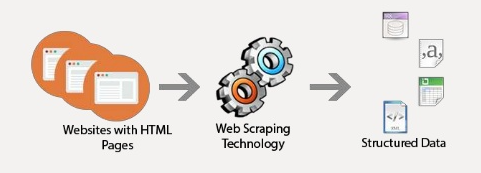

우선 용어에 대해 설명하자면 다음과 같다.  
웹 크롤링은 웹 크롤러라고 부르는 자동화 봇이 일정 규칙으로 웹 페이지를 브라우징 하는 것이다.  
웹 스크래핑은 웹 사이트 상에서 원하는 정보를 추출하는 기술이다.  

크롤링이라는 이름이 붙은 유래는 웹 사이트들을 돌아다니는 게 마치 거미가 거미집을 왔다갔다 하는 것과 비슷하다고 붙혀진 이름.  
웹에서 다양한 데이터들을 수집하려면 여러가지 웹 사이트들을 돌아다녀야 할 것이다.  
웹 크롤러는 사람 대신 이 돌아다니는 역할을 해 준다.  
그리고 스크래핑 프로그램을 통해 웹 상에 있는 정보들을 수집한다.  

두 용어를 헷깔려하는, 그리고 서술을 제대로 해 두지 않은 곳들이 많은데 섞어 쓰기는 하지만 엄연히 크롤링과 스크래핑은 다르다. 영어로 해석 해 봐도 기어가는 것과 수집하는 게 같을 수 있겠는가?  

웹 페이지는 HTML 문서로 작성 되어 있다. 물론 HTML 만 가지고 웹 페이지를 만들지는 않지만 HTML 없이 웹 페이지를 만드는 것은 글쎄다 그렇게 만든 걸 본 적이 없다.  
인터넷에 찾아보니 HTML 을 몰라도 웹을 만들 수 있는 다양한 툴 들이 존재하는 것을 확인 할 수 있었다. 물론 이렇게 만들어진 웹 페이지를 개발자도구로 분석해보면 결국 HTML이 나온다.  
여기서 잠깐. 개발자도구? 웹 브라우저마다 다르지만 대표적으로 크롬 브라우저에서는 개발자도구라는 기능을 지원한다. F12를 눌러보자. 

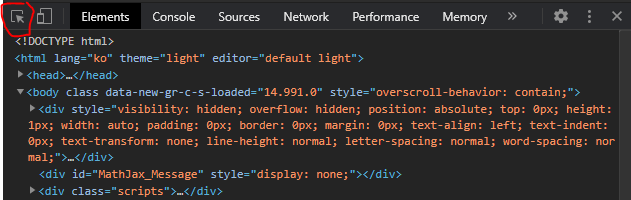

이게 무엇인가 HTML 문서 아닌가? 이 녀석의 정체는 현재 보고있는 웹 페이지의 HTML 문서다. 한 웹 페이지를 구성하는 요소들에 대해 서술이 되어있는 것이다.  
웹 페이지 안에 있는 보안에 위배되는 요소가 아닌 최소한 눈에 보이는 요소들은 대부분 여기서 찾을 수 있다.  
무슨 말이냐면 스크래핑 프로그램은 HTML 문서를 보고 웹 페이지의 정보들을 수집할 수 있다는 것이다.  
빨간 색으로 마킹한 버튼을 누르면 아래와 같은 기능을 쓸 수 있다.  

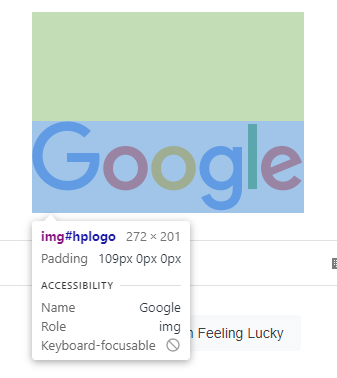

위의 사진은 구글 로고가 HTML 문서 상에서 어떻게 입력되어 있는 지 확인하는 장면이다. 저 버튼을 누르면 우리가 직접 웹 페이지에서 특정 요소들이 HTML 문서의 어디에 서술 되어 있으며 어떻게 서술 되어 있는 지 확인을 할 수 있다.  
이러한 정보들을 통해 우리는 스크래핑 프로그램에 어디에 있는 정보를 수집 할 것인지 입력 할 수 있다.  
이해가 쉽지 않을테니 예시 프로그램을 한번 실습해보도록 하자. 

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
i = 1
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(i, link.attrs['href'])
        i += 1

1 /wiki/Wikipedia:Protection_policy#semi
2 #mw-head
3 #searchInput
4 /wiki/Kevin_Bacon_(disambiguation)
5 /wiki/File:Kevin_Bacon_SDCC_2014.jpg
6 /wiki/Philadelphia,_Pennsylvania
7 /wiki/Kyra_Sedgwick
8 /wiki/Sosie_Bacon
9 #cite_note-1
10 /wiki/Edmund_Bacon_(architect)
11 /wiki/Michael_Bacon_(musician)
12 /wiki/Holly_Near
13 http://baconbros.com/
14 #cite_note-2
15 #cite_note-actor-3
16 /wiki/Footloose_(1984_film)
17 /wiki/JFK_(film)
18 /wiki/A_Few_Good_Men
19 /wiki/Apollo_13_(film)
20 /wiki/Mystic_River_(film)
21 /wiki/Balto_(film)
22 /wiki/Sleepers
23 /wiki/The_Woodsman_(2004_film)
24 /wiki/Animal_House
25 /wiki/Diner_(1982_film)
26 /wiki/Tremors_(1990_film)
27 /wiki/Crazy,_Stupid,_Love
28 /wiki/Friday_the_13th_(1980_film)
29 /wiki/Flatliners
30 /wiki/The_River_Wild
31 /wiki/Wild_Things_(film)
32 /wiki/Stir_of_Echoes
33 /wiki/Hollow_Man
34 /wiki/Frost/Nixon_(film)
35 /wiki/X-Men:_First_Class
36 /wiki/Black_Mass_(film)
37 /wiki/Patriots_Day_(film)
38 /wiki/Fox_Broadcasting_Company
39 /

이 예시는 wikipedia에서 a 태그를 모두 찾아 그 내부에 하이퍼링크가 있다면 모두 출력해보는 예시이다.  
간단한 데이터 스크래핑 프로그램인데 처음 보는 패키지들이 몇개 보일 것이다.  
패키지들에 대한 설명은 아래에 서술 해 두었다. 

#### 2. Web Scrapping에 필요한 기술들  
이 섹션에서 나오는 예제들은 실제 빅데이터 분석 수업에서 사용되었 던 코드들이다.  
이런 식으로 웹에서 정보를 스크랩 해 오는 것이다 정도로만 이해 해 보면 좋을 것 같다. 

파이썬 기본 라이브러리 docs  
https://docs.python.org/3/library/

##### 1. urllib  
URL 정보에서 문서를 읽어오는데 쓰이는 라이브러리. 

In [2]:
from urllib.request import urlopen

html = urlopen('http://pythonscraping.com/pages/page1.html')
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


##### 2. BeautifulSoup  
웹 스크래핑에 사용되는 대표적인 라이브러리

https://www.crummy.com/software/BeautifulSoup/

- parser
    - html
    - lxml : html 구조 오류 처리
    - html5lib  
    
Beautifulsoup 모듈 설치 : pip install beautifulsoup4

###### Beautifulsoup 객체 생성
- Beautifulsoup(html.read(), 'html.parser')
    - html.read(): html text 읽음
    - html.parser: 구문분석기

- 기타 구문분석기
    - lxml: 형식을 정확히 지키지 않은 html 코드 분석 (pip3 install lxml)
    - html5lib: html 오류 수정, 구문분석

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page1.html')
bs = BeautifulSoup(html.read(), 'html.parser')
#bs = BeautifulSoup(html, 'html.parser')
print(bs.h1)

<h1>An Interesting Title</h1>


###### beautifulsoup 객체 tag 추출

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page1.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.html.body.h1)
print(bs.body.h1)
print(bs.html.h1)
print(bs.h1)

<h1>An Interesting Title</h1>
<h1>An Interesting Title</h1>
<h1>An Interesting Title</h1>
<h1>An Interesting Title</h1>


###### Web 연결 예외처리
- web page를 찾을 수 없거나, URL 해석에서 오류 발생 => HTTPError
- 서버를 찾을 수 없는 경우 => URLError
- bs 객체의 tag 가 존재하지 않을 경우 => AttributeError

###### HTTP 상태 코드 & 예외처리
https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C

- 1xx (정보): 요청을 받았으며 프로세스를 계속한다
- 2xx (성공): 요청을 성공적으로 받았으며 인식했고 수용하였다
- 3xx (리다이렉션): 요청 완료를 위해 추가 작업 조치가 필요하다
- 4xx (클라이언트 오류): 요청의 문법이 잘못되었거나 요청을 처리할 수 없다
- 5xx (서버 오류): 서버가 명백히 유효한 요청에 대해 충족을 실패했다

In [6]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

try:
    html = urlopen("https://pythonscrapingthisurldoesnotexist.com")
except HTTPError as e:
    print("The server returned an HTTP error")
except URLError as e:
    print("The server could not be found!")
else:
    print(html.read())

The server could not be found!


In [7]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup


def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title


title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

<h1>An Interesting Title</h1>


###### find(), find_all(), findAll() : 특정 태그 추출

- findAll(tag, attributes, recursive, text, limit, keywors)
- find_all(tag, attributes, recursive, text, limit, keywors)
- find(tag, attributes, recursive, text, keywors)

    - tag: tag 이름 문자열, tag 이름 list
    - attributes: 속성으로 이루어진 dictionary
    - recursive: True or false, 태그의 자식, ...를 재귀적 검색
    - text: text contents로 검색
    - limit: 처음 limit 갯수까지만 
    - keywords: 특정 속성이 포함된 tag 선택

###### 2.3 tree 이동
- 위치를 기준으로 tag를 찾을 경우

자식과 자손
- childrean() 함수: 현재 선택된 tag의 자식
- descendants() : 현재 선택된 tag의 자손 (findAll)

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.prettify())

<html>
 <head>
  <style>
   img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
  </style>
 </head>
 <body>
  <div id="wrapper">
   <img src="../img/gifts/logo.jpg" style="float:left;"/>
   <h1>
    Totally Normal Gifts
   </h1>
   <div id="content">
    Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.
    <p>
     We haven't figured out how to make online shopping carts yet, but you can send us a check to:
     <br/>
     123 Main St.
     <br/>
     Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.
    </p>
   </div>
   <table id="giftList">
    <tr>
     <th>
      Item Title
     </th>
     <th>
      Description
     </th>
     <th>
      Cost
     </th>
     <th>
      Image
     </th>
   

In [9]:
# 자식 tag
list(bs.children)

[<html>
 <head>
 <style>
 img{
 	width:75px;
 }
 table{
 	width:50%;
 }
 td{
 	margin:10px;
 	padding:10px;
 }
 .wrapper{
 	width:800px;
 }
 .excitingNote{
 	font-style:italic;
 	font-weight:bold;
 }
 </style>
 </head>
 <body>
 <div id="wrapper">
 <img src="../img/gifts/logo.jpg" style="float:left;"/>
 <h1>Totally Normal Gifts</h1>
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift f

In [10]:
for child in bs.find('table',{'id':'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


In [11]:
# descendants
print(len(list(bs.find('table',{'id':'giftList'}).descendants)))
print(len(list(bs.find('table',{'id':'giftList'}).children)))            # \n 도 포함

86
13


###### 형제 node
- next_siblings, next_sibling
- previous_siblings, previous_sibling

In [12]:
# 테이블에서 첫번째 title 행을 제외한 모든 entry 제품
for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling) 



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

###### 부모 다루기
- parent, parents

In [13]:
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
      .parent.previous_sibling.get_text())


$15.00



지금까지 간단히 Web Scrapping에 쓰이는 기술들에 대해 알아보았다. 좀 더 자세한 것들은 따로 서술하지 않겠다.  
마지막으로 Data Scrapping 하는 예제 하나만 실습해보고 본론으로 넘어가자. 

#### 3. Data Scrapping 예제 : 처갓집 양념치킨

In [14]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from itertools import count

In [15]:
Cheogajip_URL = 'http://www.cheogajip.co.kr/bbs/board.php?bo_table=store?&search=&keyword=&page=10'
print (Cheogajip_URL)

http://www.cheogajip.co.kr/bbs/board.php?bo_table=store?&search=&keyword=&page=10


In [16]:
response = urllib.request.urlopen(Cheogajip_URL)

In [17]:
soupData = BeautifulSoup(response.read().decode(), 'html.parser')
print(soupData.prettify())

<!DOCTYPE doctype html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="no" http-equiv="imagetoolbar"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="fPxfXk5Uba1xkutGmVu0o3UOkghbAfW3T0UQpsNm-x0" name="google-site-verification">
   <meta content="Hm3D5oWgWlDJfHL-OaWXF8IzmuFlwi6iF4sMhhQGIFk" name="google-site-verification">
    <meta content="6JYC4qFZD7Ke-j0e-uBFpMEeqFdUjxHws6rbdXyt_GQ" name="google-site-verification">
     <meta content="gqANArNHguiaERcB1Fyprk75SZHNTErV4zJc07zbaqY" name="google-site-verification"/>
     <meta content="FqIagzLQEKEhog5j3bMfV1VeEg0Qe5kZ31ctpt_5q-I" name="google-site-verification"/>
     <meta content="T53SBP0rfqtNzLibUN25MaZS-sqnzqKc9leU1-vfz1o" name="google-site-verification"/>
     <meta content="mE6UNp2QH8wG2vhbcrnS83e2NahS-Qpy18qOq7VVSRQ" name="google-site-verification"/>
     <link href="/favicon.ico" rel="shortcut icon" type="image/x-ico"/>
     <title>
      매장찾기 10 페이지 | 처갓집양념치킨
     </title>
     <li

In [18]:
store_trs = soupData.findAll('tr', attrs={'class':''})

In [19]:
store_trs[:]

[<tr>
 <th scope="col">지역</th>
 <th scope="col">매장명</th>
 <th scope="col">주소</th>
 <th scope="col">전화번호</th>
 <th scope="col">자세히</th>
 </tr>, <tr class="">
 <td class="td_date">서울특별시</td>
 <td class="td_date">위례중앙점</td>
 <td class="td_subject">서울 송파구 장지동 896</td>
 <td class="td_date">02-400-7288</td>
 <td class="td_date" style="width:80px;"><a href="http://www.cheogajip.co.kr/bbs/board.php?bo_table=store&amp;wr_id=1409&amp;page=10" style="font-size:11px; color:#fff;  padding:1px 12px; border-radius:16px; background:#aaa; font-weight:bold;">more</a></td>
 </tr>, <tr class="">
 <td class="td_date">울산광역시</td>
 <td class="td_date">성남점</td>
 <td class="td_subject">울산광역시 중구 중앙길 118, 1층 (성남동)</td>
 <td class="td_date">052-245-7245</td>
 <td class="td_date" style="width:80px;"><a href="http://www.cheogajip.co.kr/bbs/board.php?bo_table=store&amp;wr_id=1408&amp;page=10" style="font-size:11px; color:#fff;  padding:1px 12px; border-radius:16px; background:#aaa; font-weight:bold;">more</a></td>
 <

In [21]:
result=[]
for store_tr in store_trs[1:]:
    sido = store_tr.td
    if (sido.text == "게시물이 없습니다."):
        break
    #find('td',attrs={'class':'td_date'}).get_text()
    store_name = sido.find_next('td').get_text()
    store_address = store_tr.find('td',attrs={'class':'td_subject'}).get_text().strip().split(',')[0]
    store_sido_gu = store_address.split()[:2]
    result.append([store_name] + store_sido_gu + [store_address])

In [22]:
result

[['위례중앙점', '서울', '송파구', '서울 송파구 장지동 896'],
 ['성남점', '울산광역시', '중구', '울산광역시 중구 중앙길 118'],
 ['호평점', '경기', '남양주시', '경기 남양주시 늘을2로 96'],
 ['남면점', '경상북도', '김천시', '경상북도 김천시 천동길 303-5'],
 ['죽도점', '경상북도', '포항시', '경상북도 포항시 북구 대해로 15'],
 ['금장현곡점', '경상북도', '경주시', '경상북도 경주시 현곡면 금장5길 34-15'],
 ['관음점', '대구광역시', '북구', '대구광역시 북구 칠곡중앙대로 429'],
 ['이곡신당점', '대구광역시', '달서구', '대구광역시 달서구 선원로37길 20'],
 ['동성로점', '대구광역시', '중구', '대구광역시 중구 국채보상로123길 23'],
 ['유강점', '경상북도', '포항시', '경상북도 포항시 남구 연일읍 유강길 17']]

##### 전체 매장 주소 읽기
- 매장 페이지 수 : 106

In [23]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from itertools import count

In [24]:
result=[]

for page in range(1,107):
    Cheogajip_URL = 'http://www.cheogajip.co.kr/bbs/board.php?bo_table=store?&search=&keyword=&page=%s' % page
    response = urllib.request.urlopen(Cheogajip_URL)
    print("page : %s" %page)
    soupData = BeautifulSoup(response.read().decode(), 'html.parser')
    store_trs = soupData.findAll('tr', attrs={'class':''})
    for store_tr in store_trs[1:]:
        sido = store_tr.td
        if (sido.text == "게시물이 없습니다."):
            break
        #find('td',attrs={'class':'td_date'}).get_text()
        store_name = sido.find_next('td').get_text()
        store_address = store_tr.find('td',attrs={'class':'td_subject'}).get_text().strip().split(',')[0]
        store_sido_gu = store_address.split()[:2]
        result.append([store_name] + store_sido_gu + [store_address])

page : 1
page : 2
page : 3
page : 4
page : 5
page : 6
page : 7
page : 8
page : 9
page : 10
page : 11
page : 12
page : 13
page : 14
page : 15
page : 16
page : 17
page : 18
page : 19
page : 20
page : 21
page : 22
page : 23
page : 24
page : 25
page : 26
page : 27
page : 28
page : 29
page : 30
page : 31
page : 32
page : 33
page : 34
page : 35
page : 36
page : 37
page : 38
page : 39
page : 40
page : 41
page : 42
page : 43
page : 44
page : 45
page : 46
page : 47
page : 48
page : 49
page : 50
page : 51
page : 52
page : 53
page : 54
page : 55
page : 56
page : 57
page : 58
page : 59
page : 60
page : 61
page : 62
page : 63
page : 64
page : 65
page : 66
page : 67
page : 68
page : 69
page : 70
page : 71
page : 72
page : 73
page : 74
page : 75
page : 76
page : 77
page : 78
page : 79
page : 80
page : 81
page : 82
page : 83
page : 84
page : 85
page : 86
page : 87
page : 88
page : 89
page : 90
page : 91
page : 92
page : 93
page : 94
page : 95
page : 96
page : 97
page : 98
page : 99
page : 100
page : 1

In [25]:
len(result)

1060

In [26]:
cheogajip_table = pd.DataFrame(result, columns=('store', 'sido', 'gungu', 'store_address'))
cheogajip_table.to_csv("cheogajip.csv", encoding="cp949", mode='w', index=True)

### 3. 내가 만약 축구팀 감독이라면?  
자 서론이 길었다. 책의 내용을 이해하는 데 필요한 서론들은 아니지만 이런 식으로 데이터를 수집해서 온다는 것을 보여주기 위한 목적이었다.  
이제 이렇게 수집 된 데이터가 있다고 치고 한번 이 데이터들을 통해 무언 가 해보도록 하자. 

데이터를 참고하여 선수들의 특성에 따라 선수들을 분류하는 프로그램을 한번 만들어 보도록 하자. 

#### csv 파일에서 데이터를 읽어 온 후 확인하기

In [ ]:
# 파일에 저장한 데이터를 불러와 출력하기

import pandas as pd

fifa2019 = pd.read_csv('fifa2019.csv')        # fifa2019.csv 파일의 데이터 불러오기

print(fifa2019.shape)                         # 출력하기

(18207, 89)


In [ ]:
print(fifa2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

##### 레이블 인덱스가 14인 선수에 대해 출력해보기

In [ ]:
sub1 = fifa2019.loc[14]      # fifa2019의 인덱스 레이블 14인 행값을 sub1에 저장
print(sub1)

Unnamed: 0                                                    14
ID                                                        215914
Name                                                    N. Kanté
Age                                                           27
Photo             https://cdn.sofifa.org/players/4/19/215914.png
                                       ...                      
GKHandling                                                    12
GKKicking                                                     10
GKPositioning                                                  7
GKReflexes                                                    10
Release Clause                                           €121.3M
Name: 14, Length: 89, dtype: object


##### 특정 범위 내의 데이터 검색하기

In [ ]:
sub2 = fifa2019.loc[2:16]                        # 인덱스 레이블 2부터 16까지인 행 값을 sub2에 저장하기
print(sub2)


    Unnamed: 0      ID  ... GKReflexes  Release Clause
2            2  190871  ...       11.0         €228.1M
3            3  193080  ...       94.0         €138.6M
4            4  192985  ...       13.0         €196.4M
5            5  183277  ...        8.0         €172.1M
6            6  177003  ...        9.0         €137.4M
7            7  176580  ...       37.0           €164M
8            8  155862  ...       11.0         €104.6M
9            9  200389  ...       89.0         €144.5M
10          10  188545  ...       10.0         €127.1M
11          11  182521  ...       10.0         €156.8M
12          12  182493  ...       15.0          €90.2M
13          13  168542  ...       12.0           €111M
14          14  215914  ...       10.0         €121.3M
15          15  211110  ...        8.0         €153.5M
16          16  202126  ...       11.0         €160.7M

[15 rows x 89 columns]


##### 전체 선수들의 이름과 선호하는 발 정보 출력하기

In [ ]:
sub3 = fifa2019.loc[:,['Name', 'Preferred Foot']]
print(sub3)

                     Name Preferred Foot
0                L. Messi           Left
1       Cristiano Ronaldo          Right
2               Neymar Jr          Right
3                  De Gea          Right
4            K. De Bruyne          Right
...                   ...            ...
18202        J. Lundstram          Right
18203  N. Christoffersson          Right
18204           B. Worman          Right
18205      D. Walker-Rice          Right
18206           G. Nugent          Right

[18207 rows x 2 columns]


##### 여러 행의 데이터 중 원하는 열 값만 골라 출력하기

In [ ]:
sub4 = fifa2019.iloc[0:10,1:3]         # 0~9행, 1, 2열값을 sub4에 저장하기
print(sub4)

       ID               Name
0  158023           L. Messi
1   20801  Cristiano Ronaldo
2  190871          Neymar Jr
3  193080             De Gea
4  192985       K. De Bruyne
5  183277          E. Hazard
6  177003          L. Modrić
7  176580          L. Suárez
8  155862       Sergio Ramos
9  200389           J. Oblak


##### 우리나라 선수 출력하기 

In [ ]:
korea_player=fifa2019['Nationality']=='Korea Republic'

sub5 = fifa2019.loc[korea_player]

print(korea_player)
print(sub5)

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Nationality, Length: 18207, dtype: bool
       Unnamed: 0      ID  ... GKReflexes  Release Clause
125           125  200104  ...       10.0          €71.2M
1295         1295  180283  ...       10.0          €14.3M
1407         1407  182152  ...        9.0          €12.8M
2002         2002  211927  ...        8.0          €17.6M
2021         2021  221671  ...        8.0          €13.8M
...           ...     ...  ...        ...             ...
17955       17955  240272  ...       12.0            €73K
17959       17959  245401  ...       12.0            €73K
17965       17965  243359  ...       11.0           €131K
18058       18058  244108  ...       10.0           €104K
18084       18084  244411  ...        5.0            €73K

[335 rows x 89 columns]


In [ ]:
sub6 = sub5['Name']
print(sub6)

125               H. Son
1295       Ki Sung Yueng
1407        Koo Ja Cheol
2002     Kwon Chang Hoon
2021        Lee Jae Sung
              ...       
17955     Min Gyeong Min
17959       Lee Dong Hee
17965       Kim Jong Jin
18058    Hong Hyeon Seok
18084        Kwon Ki Pyo
Name: Name, Length: 335, dtype: object


#### 데이터 시각화 하기

##### 선호하는 발 정보 시각화

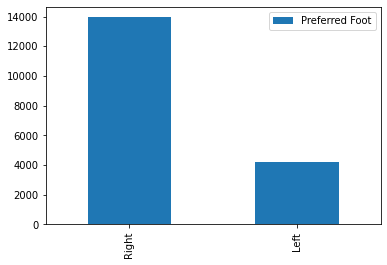

In [ ]:
import matplotlib.pyplot as plt          # 그래프를 출력하기 위한 모듈

fifa2019['Preferred Foot'].value_counts().plot(kind='bar')
plt.legend()                             # 범례 표시하기
plt.show()      

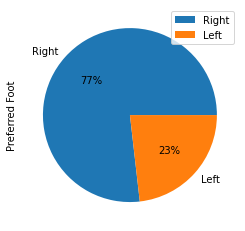

In [ ]:
fifa2019['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.f%%')
plt.legend()                            # 범례 표시하기
plt.show()        

#### 학습하기
여러 선수의 체력과 드리블 능력 데이터를 상, 중, 하의 3개의 팀으로 나누는 프로그램

##### 데이터 정렬

In [ ]:
df = pd.DataFrame.copy(fifa2019.sort_values(by = 'Overall', ascending = False).head(200))
#전반적인 능력치 (Overall)을 기준으로 높은 순서대로 200명 선발
test_features=['Name','Stamina','Dribbling','ShortPassing','Penalties']
#많은 특성 중에 필요한 특성을 따로 list로 저장
test_df= pd.DataFrame(df, columns = test_features)
#test_features들을 colums로 하는 dataframe 생성
print(test_df.head(5))
#상위 5개 출력

                Name  Stamina  Dribbling  ShortPassing  Penalties
0           L. Messi     72.0       97.0          90.0       75.0
1  Cristiano Ronaldo     88.0       88.0          81.0       85.0
2          Neymar Jr     81.0       96.0          84.0       81.0
3             De Gea     43.0       18.0          50.0       40.0
4       K. De Bruyne     90.0       86.0          92.0       79.0


##### K-means clustering 알고리즘 적용

###### 1단계 : 표본 공간에 k개의 중심을 무작위로 생성

In [ ]:
import numpy as np
XY = np.array(test_df)
#테스트 데이터프레임으로 numpy array 생성
X = XY[:,1:3]
#우리가 필요한 건 두 번째와 세 번째 열의 모든 행, 즉 XY[:,1:3]만을 슬라이싱 함
# 표본공간에 k개의 중심을 무작위로 생성하기
k = 3                                 #분류하려는 군집의 개수가 3개이므로 k=3
C_x = np.random.choice(X[:,0],k)
#데이터 셋에서 k개를 무작위로 선택하고 선택된 체력 데이터의 값을 중심의 x축 좌표로 지정함
C_y = np.random.choice(X[:,1],k)
#데이터 셋에서 k개를 무작위로 선택하고 선택된 드리블 데이터의 값을 중심의 y축 좌표로 지정함
C = np.array(list(zip(C_x, C_y)))
#만든 배열 두개를 하나의 배열로 만들기 위해 zip 함수 사용함
print(C)

[[92. 83.]
 [67. 79.]
 [39. 80.]]


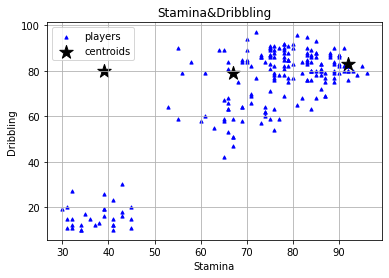

In [ ]:
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']

plt.title('Stamina&Dribbling')
plt.xlabel('Stamina')
plt.ylabel('Dribbling')
plt.scatter(Stamina,Dribbling,marker='^',c='blue',s=10,label='players')
# 중심점 표시
plt.scatter(C_x, C_y, marker='*', s=200, c='black',label='centroids')

plt.legend(loc='best')
plt.grid()
plt.show()

###### 각 표본에 가까운 중심에 할당하기

In [ ]:
# 유클리디안 거리 계산 함수 만들기
def Distance(A, B):
    return np.sqrt(np.sum(np.power((A-B),2)))


# 각 군집의 중심을 새롭게 계산하기 

C_old = np.zeros(C.shape)       # 중심의 좌표를 업데이트하기 위해 동일한 크기의 행렬을 선언 
clusters = np.zeros(len(X))     # 모든 데이터의 클러스터 라벨을 저장하기 위해 행렬을 선언, 초깃값은 0으로 할당
flag = Distance(C, C_old)       # 반복문의 종료 기준이 될 변수 선언, 중심 C의 좌표가 더이상 변화가 없을 때까지 반복하는 기준이 됨.
print(C_old)
print(flag)


[[0. 0.]
 [0. 0.]
 [0. 0.]]
184.40173534975207


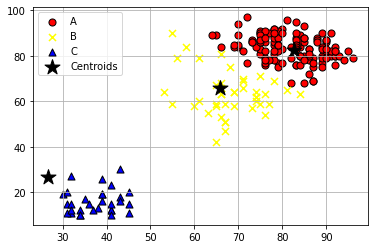

In [ ]:
# 클러스터 할당이 변경되지 않을 때까지 반복하기
from copy import deepcopy

distances = []
while flag !=0:                     #SSE
    for i in range(len(X)):
      for j in range(3):
        temp = Distance(X[i], C[j])
        distances.append(temp)
      cluster = np.argmin(distances)
      clusters[i] = cluster
      distances = []
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)
    flag = Distance(C, C_old)
    
# 군집화 결과 시각화하기
import matplotlib.pyplot as plt

# 1번 군집
plt.scatter(X[clusters == 0,0], X[clusters == 0,1], s=50, c='red', marker='o', edgecolor='black', label='A')
            
# 2번군집
plt.scatter(X[clusters == 1,0], X[clusters == 1,1], s=50, c='yellow', marker='x', edgecolor='black', label='B')

# 3번 군집
plt.scatter(X[clusters == 2,0], X[clusters == 2,1], s=50, c='blue', marker='^', edgecolor='black', label='C')

# 군집의 중심 좌표들
plt.scatter(C[:, 0], C[:, 1], s=250, marker='*', c='black', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()
